In [90]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [80]:
#on crée les noeuds (ou vertice) et les edges (ou lines), en spécifiant des poids des edges et des noeuds
#et des noeuds (qui sont la somme de tous les poids des edges connectés au noeud)
G=nx.Graph()
G.add_edge("kurosawa","truffaut",weight=50)
G.add_edge("kurosawa","rohmer",weight=30)
G.add_edge("truffaut","rohmer",weight=100)
G.add_edge("truffaut","etaix",weight=60)
nodelist = ["kurosawa","truffaut","rohmer","etaix"]
node_size  = [80,210,130,60]
edge_size  = [50,30,100,60]

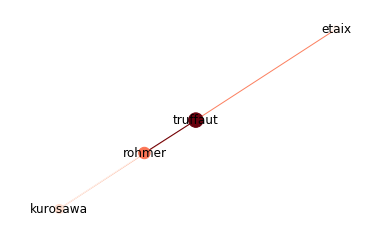

In [86]:
mymap=plt.get_cmap("Reds")
pos = nx.spring_layout(G)
colors = range(4) 
nx.draw_networkx(G,pos,node_size =node_size ,node_color=node_size,nodelist=nodelist,cmap=mymap,
                edge_size =edge_size ,edge_color=edge_size,edge_cmap=mymap)
plt.axis('off')#on vire les axes
plt.show()

In [289]:
#maintenant on le fait pour de vrai
df = pd.read_csv("500 directors_links_matrix.csv", sep=";", low_memory=False,index_col="director_name")

In [388]:
#mes paramètres de selection des nodes/edges
director_from=1
director_to=500
min_strenght_to_show = 80
max_strenght_to_show = 98
edge_size=[]
G=nx.Graph()
#On ajoute les noeuds et les poids des relations
for i in range (director_from,director_to):
    for j in range (i,director_to):
        edge_strenght = int(df.iat[i,j])
        if i!=j and edge_strenght>min_strenght_to_show and edge_strenght<max_strenght_to_show:
            #on prend uniquement l'initiale prénom + nom de famille
            nom_i = df.index.values[i].split(" ")
            nom_i=df.index.values[i][0]+"."+nom_i[len(nom_i)-1]
            nom_j = df.index.values[j].split(" ")
            nom_j=df.index.values[j][0]+"."+nom_j[len(nom_j)-1]

            G.add_edge(nom_i,nom_j,weight=edge_strenght)
            edge_size.append(edge_strenght)

            #print(nom_i+","+nom_j+":"+str(G.number_of_edges())+","+str(len(edge_size)))

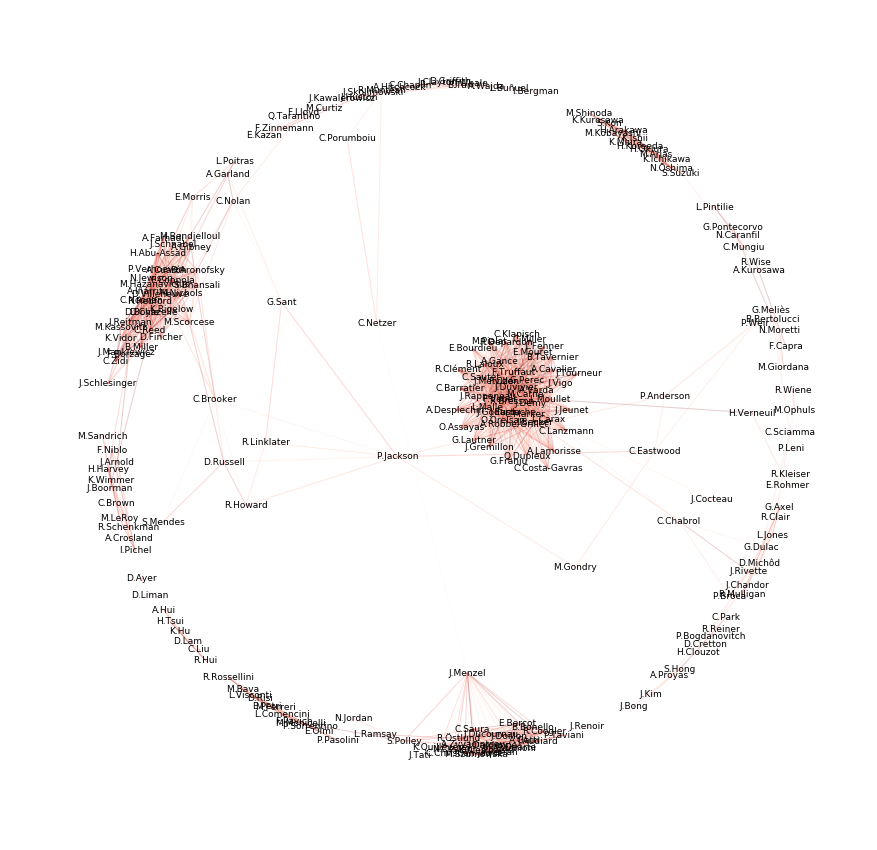

In [394]:
#mes paramètres d'affichage
figure_size=15
distance_between_nodes=0.35

#on affiche le graphe
plt.figure(figsize=(figure_size,figure_size))
mymap=plt.get_cmap("Reds")
pos = nx.spring_layout(G,k=distance_between_nodes,weight="weight")
nx.draw_networkx(G,pos,node_size =1,font_size =9,alpha =0.2,
                 edge_size =edge_size ,edge_color=edge_size,edge_cmap=mymap,edge_vmin=min_strenght_to_show,edge_vmax=max_strenght_to_show)
plt.axis('off')#on vire les axes
plt.savefig('network_graph.png')
plt.show()